In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test_data = pd.read_csv("../Downloads/titanic/test.csv")
train_data = pd.read_csv("../Downloads/titanic/train.csv")

In [4]:
test_df = pd.DataFrame(test_data)
train_df = pd.DataFrame(train_data)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


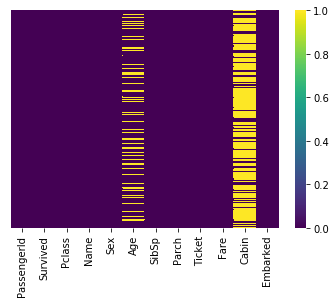

In [6]:
sns.heatmap(train_data.isnull(), yticklabels = False, cmap = 'viridis')

In [7]:
sns.set_style('whitegrid')

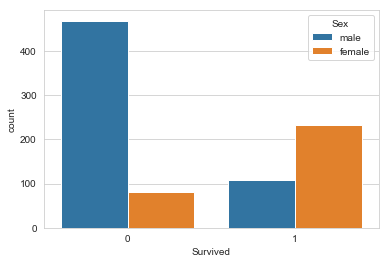

In [8]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)

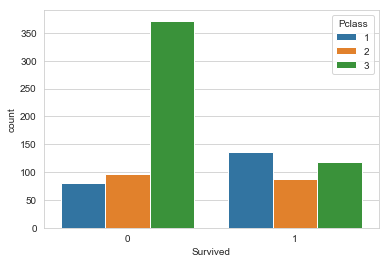

In [9]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)

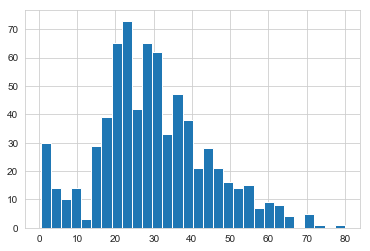

In [10]:
train_data['Age'].hist(bins = 30)

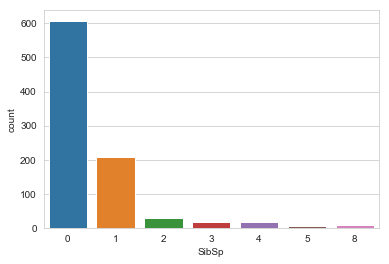

In [11]:
sns.countplot(x = 'SibSp', data = train_data)

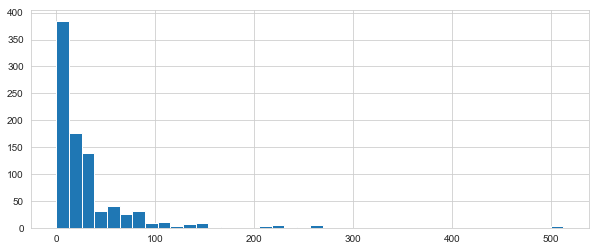

In [12]:
train_data['Fare'].hist(bins = 40, figsize = (10, 4))

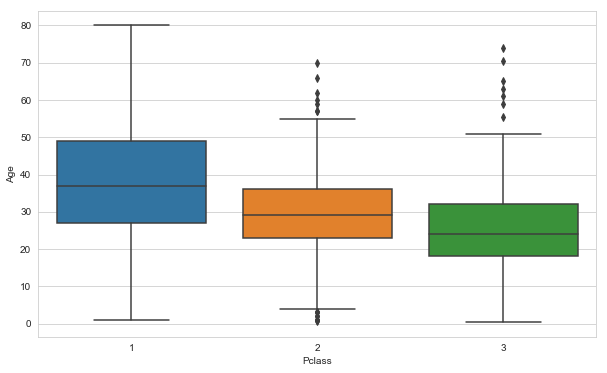

In [13]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data)

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [17]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

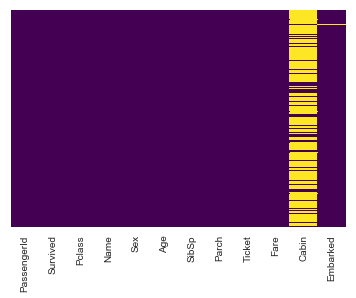

In [19]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
train_data.drop('Cabin',axis=1,inplace=True)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train_data.dropna(inplace=True)

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [31]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

KeyError: 'Sex'

In [30]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [35]:
train = pd.concat([train_data,sex,embark],axis=1)

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [38]:
X = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [39]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                           random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()

In [52]:
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
predictions = logmodel.predict(X_test) # We want to predict values from 
                                       # the X_test data set

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       163
           1       0.72      0.46      0.56       104

   micro avg       0.72      0.72      0.72       267
   macro avg       0.72      0.67      0.68       267
weighted avg       0.72      0.72      0.70       267

